In [1]:
import numpy as np
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing
import time
import random
import pickle

# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [22]:
model = Word2Vec.load('./model/word2vec_baike')

In [23]:
wv = np.load('./model/wv.npy')
vocab = []
with open('./data/common_word_list.txt', encoding = 'utf-8') as f:
    for line in f.readlines():
        vocab.append(line.strip())
print(vocab[:10])
print(wv[:10])

['一', '一一', '一丁点儿', '一下', '一专多能', '一世', '一丘之貉', '一丝不挂', '一丝不苟', '一个心眼儿']
[[ 0.12077881  0.01579624 -0.16018876 ...  0.14167114  0.043945
  -0.08207788]
 [-0.1587381   0.2181573  -0.20078327 ...  0.06095327  0.09027559
   0.13185246]
 [ 0.28895995  0.32369     0.00986398 ... -0.1749011  -0.10420036
  -0.08039057]
 ...
 [-0.07374783 -0.35918233  0.23576638 ...  0.06894048 -0.53702134
   0.2312663 ]
 [ 0.1194022  -0.01366967 -0.3884288  ...  0.20233642 -0.07473911
   0.16539133]
 [ 0.23417552 -0.0485241  -0.0285177  ...  0.03321343 -0.00941553
  -0.13841018]]


In [24]:
print(len(vocab), wv.shape)

54639 (54639, 256)


In [26]:
profs = []
with open('./class/profs.txt', encoding = 'utf-8') as f:
    for word in f.readlines():
        word = word.strip()
        profs.append(word)

In [27]:
print(profs, len(profs))

['监理', '木匠', '商人', '哲学家', '工程师', '育婴师', '杂工', '花匠', '调酒师', '营养师', '教练员', '车手', '法官', '画家', '环卫工人', '管道工', '造型师', '调查员', '美容师', '饲养员', '演奏家', '副机长', '狱警', '精算师', '飞行员', '导购员', '清洁工', '教师', '矿工', '建筑家', '法医', '裁判员', '侍者', '老师', '外科医生', '泥水匠', '邮递员', '漫画家', '医生', '厨师', '农民', '助理', '按摩师', '畜牧师', '司机', '主播', '面包师', '史学家', '美发师', '检修工', '保洁员', '播音员', '空姐', '建筑师', '翻译员', '导游员', '焊工', '服装师', '指挥家', '执法员', '烘焙师', '钢琴家', '修理工', '统计员', '戏剧家', '摄像师', '保姆', '助产士', '政治家', '交警', '学者', '月嫂', '机修工', '治疗师', '音效师', '推销员', '芭蕾舞', '采购员', '航海家', '保安', '针灸师', '协警', '猎人', '统计师', '检察官', '外交官', '机械师', '审计员', '军人', '工人', '特技师', '护理员', '侦探', '调度员', '建筑工人', '审计师', '科长', '勤杂工', '干警', '伐木工', '驾驶员', '化验员', '理财师', '总经理', '出纳', '瓦匠', '化妆师', '教练', '售货员', '护士', '指导员', '客服', '模特', '文员', '城管', '洗碗工', '探险家', '机长', '内科医生', '保健员', '驯兽师', '收银员', '导演', '歌手', '军官', '救生员', '美术师', '环卫工', '乘务员', '水手', '操作工', '军事家', '剪辑师', '督导员', '质检员', '会计师', '音乐家', '警卫', '运动员', '侍应生', '厨师长', '警察', '技师', '设计师', '兽医', '经纪人', '屠夫', '服务员', '发明家', '特警'

In [28]:
cnt = 0
for i in profs:
    if model[i].all() == wv[vocab.index(i)].all():
        cnt += 1
    else:
        print(i, model[i], wv[vocab.index(i)])
cnt

D:\IDEs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


215

In [29]:
label = np.zeros(len(vocab))
cnt = 0
for word in profs:
    if word not in vocab:
        print(word)
        cnt+=1
    else:
        i = vocab.index(word)
        label[i] = 1

In [30]:
r_model = linear_model.LinearRegression()
r_model.fit(wv, label)
display(r_model.intercept_) 
display(r_model.coef_)
# pickle.dump()

0.010417232

array([ 9.40229185e-03, -2.48355884e-03,  8.49939883e-04,  2.77994573e-03,
       -1.06463647e-02,  4.68048034e-03,  5.53956209e-03, -2.62106350e-03,
       -4.12748754e-03, -1.55864633e-03, -7.38663040e-03, -5.75251528e-04,
        4.34616394e-03, -6.02125539e-04, -1.75123720e-03,  1.00825075e-02,
        1.05034346e-02, -3.99925094e-03,  3.36049590e-04,  2.87534436e-04,
       -4.58798371e-03,  1.14230784e-02, -1.14975320e-02, -3.10581923e-03,
        3.36887152e-03, -5.43362554e-03,  7.36020622e-04, -3.68983112e-03,
       -1.11128320e-03,  8.50824732e-03,  5.31701371e-04, -1.07000982e-02,
        1.52439065e-03, -2.04321137e-03,  5.16281463e-03, -6.37854263e-03,
        2.71145767e-03,  3.11964564e-03,  9.08393995e-05,  8.44305754e-03,
       -3.70242470e-03, -4.58676973e-03,  3.48672876e-03, -2.92438827e-03,
       -4.27727913e-03, -2.50816764e-03,  4.31204913e-03,  4.02687304e-03,
        2.30588508e-03,  1.03636098e-03,  2.86229094e-03,  6.37810724e-03,
       -8.32532533e-03, -

In [31]:
r_model.coef_.shape

(256,)

In [32]:
weights = r_model.coef_
bias = r_model.intercept_

Picture has been saved as ./pics/weight_210402_1902.png.


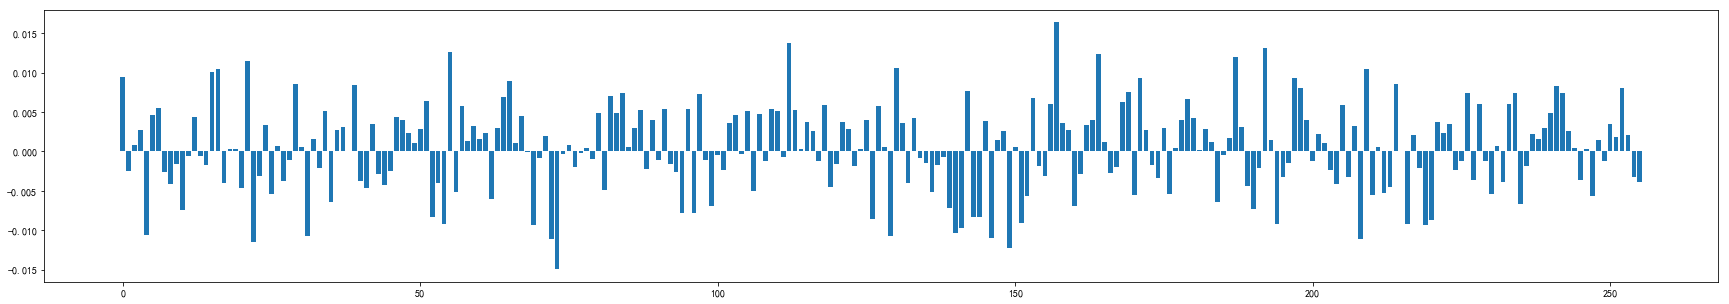

In [33]:
# weights in each dimensions
file_name = f'./pics/weight_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 5))
plt.bar(x, r_model.coef_)
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}.')
plt.show()

Picture has been saved as ./pics/samples_210402_1902.png.


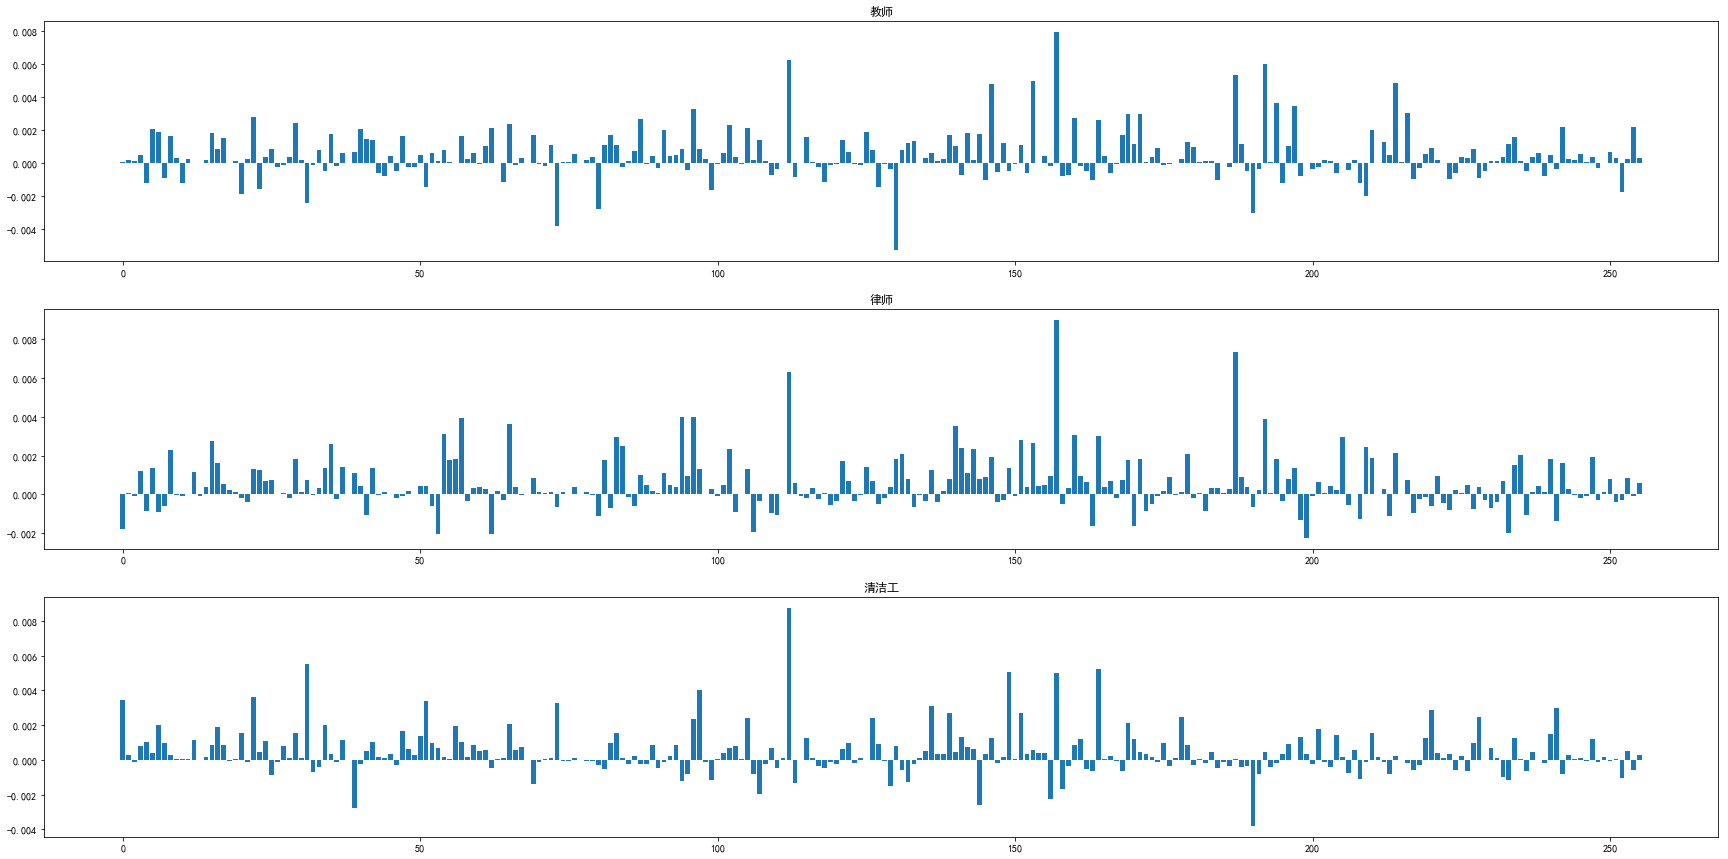

In [34]:
# samples
file_name = f'./pics/samples_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
x = np.arange(0, 256, 1)
plt.figure(figsize=(30, 15))
plt.subplot(311)
plt.title('教师')
plt.bar(x, weights*wv[vocab.index('教师')])
plt.subplot(312)
plt.title('律师')
plt.bar(x, weights*wv[vocab.index('律师')])
plt.subplot(313)
plt.title('清洁工')
plt.bar(x, weights*wv[vocab.index('清洁工')])
plt.savefig(file_name)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [35]:
# 词向量*权重热力图
profs_wv = []
for word in profs:
    profs_wv.append(wv[vocab.index(word)])

profs_wv = np.array(profs_wv)
profs_wv.shape

(215, 256)

In [36]:
pre_mat = profs_wv*weights
pre_avg = np.mean(pre_mat, axis=0)
pre_avg.shape

(256,)

Picture has been saved as ./pics/heatmap_words_210402_1902.png.


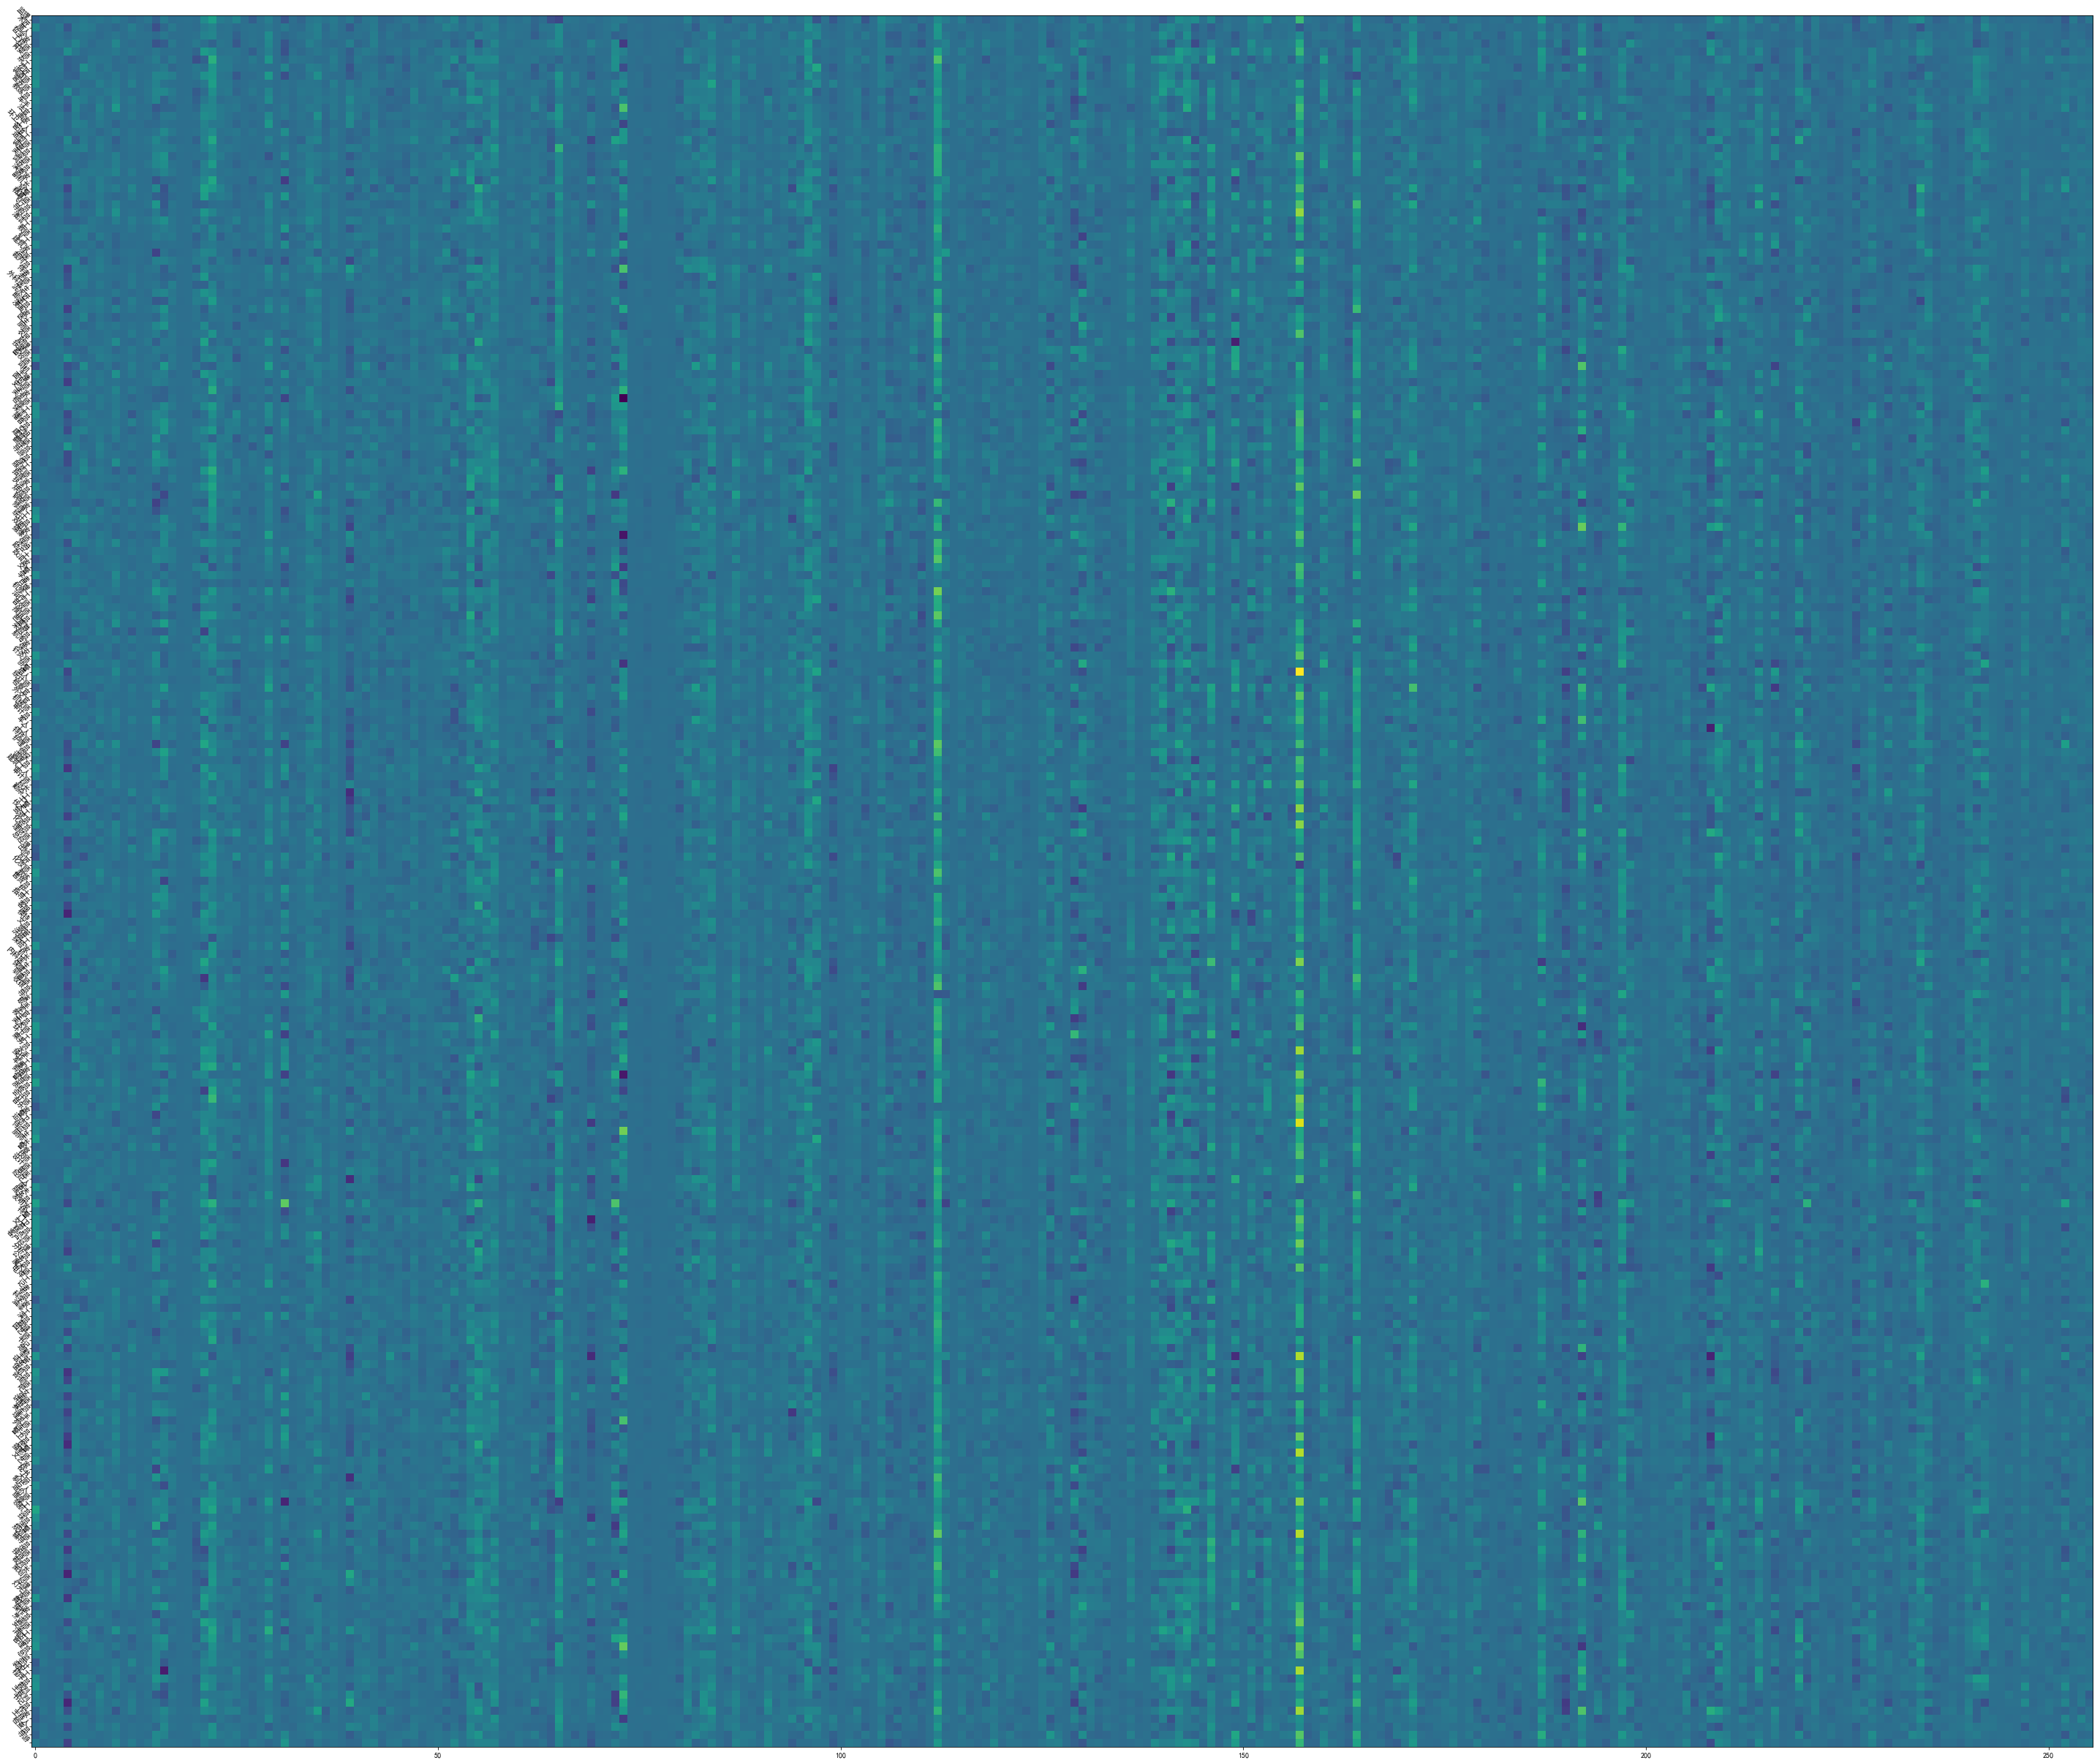

In [37]:
# Heatmap
file_name = f'./pics/heatmap_words_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig, ax = plt.subplots(figsize=(40, 40))
im = ax.imshow(pre_mat)
ax.set_yticks(np.arange(len(profs)))
ax.set_yticklabels(profs)
plt.setp(ax.get_yticklabels(), rotation=-45, ha="right", rotation_mode="anchor")
fig.tight_layout()
# plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

In [38]:
print(np.argsort(-pre_avg))

[157 112 164  22 197  65  96 146 171 187 143  57  54  21 192 142 234  55
  84 140  29 160  87  73 214 219  56  97 209  83  35 136   0 210 149 242
 153 105 228  34 240 241 125  15 139 247  16  10  47  91 178 176  42 151
 205 102 170  81  37  72 235   8 179   5  23  95 115  24  89 130 141 127
  93 204 131  82 101   6 212  41  12 254  31 156 144  51 155 175 118 148
 169 201   3  59  40 252 221 196  50 121  17 113   9 119 243 198 122  94
  49 126  45 203 253  61  14 225 255   7 154 161  62  86 238  52  33 213
  25 250  60  66  44  88  92  28 109 172 233 216 227  67 188  27 138 186
 220 232  71  98 111  19   1 166 249 211 189  78  30  63 184 244  13 181
  58 168 134 246 165 185 177  38 215  48  18 162 199 104 129  77 114  68
 135 152 100  11 174  75  74  85 145 183 231  79 167 251  53 202 124 173
 108 150 116  26   2  36 248  70 191 128 120 222 193 229  20 137  80 133
 207 159  32 200 132 117 239  90 237 123  43  46 230 147 107 103 245 180
  76 182 223 106 218 195 194 208 224 158 236  99 21

In [39]:
print(pre_avg[np.argsort(-pre_avg)[:10]])

[0.00688281 0.00576389 0.00401091 0.0030051  0.00291746 0.00290969
 0.00267712 0.00264926 0.00252054 0.00239149]


In [40]:
# print(pre_mat[:,157].argsort():)
# print(pre_mat[:,112].argsort())
# print(pre_mat[:,164].argsort)

rm_dict = {}
for i in pre_mat[:,157].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 1
    else:
        rm_dict[word] += 1

In [41]:
for i in pre_mat[:,112].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 1
    else:
        rm_dict[word] += 1

for i in pre_mat[:,164].argsort()[:100]:
    word = profs[i]
    # print(word)
    if word not in rm_dict.keys():
        rm_dict[word] = 1
    else:
        rm_dict[word] += 1       
rm_dict

{'瓦匠': 1,
 '泥水匠': 1,
 '木匠': 2,
 '屠夫': 1,
 '矿工': 3,
 '经纪人': 2,
 '裁缝': 2,
 '吧女': 2,
 '驯兽师': 1,
 '侍者': 2,
 '美术师': 2,
 '按摩师': 1,
 '花匠': 2,
 '治疗师': 2,
 '保姆': 1,
 '杂工': 2,
 '理发师': 1,
 '助理': 1,
 '护理员': 1,
 '总监': 2,
 '月嫂': 2,
 '洗碗工': 1,
 '魔术师': 1,
 '总经理': 2,
 '猎人': 1,
 '农民': 2,
 '分析员': 2,
 '造型师': 2,
 '秘书': 2,
 '歌手': 2,
 '营养师': 1,
 '翻译员': 2,
 '水手': 2,
 '面包师': 3,
 '制片人': 2,
 '助产士': 2,
 '音效师': 2,
 '书记': 2,
 '内科医生': 2,
 '针灸师': 1,
 '裁判长': 1,
 '主播': 2,
 '记者': 3,
 '电焊工': 2,
 '主管': 2,
 '环卫工': 1,
 '模特': 2,
 '经理': 2,
 '裁判': 1,
 '技师': 1,
 '主持人': 3,
 '设计师': 2,
 '建筑工人': 2,
 '商人': 3,
 '专员': 1,
 '修理工': 1,
 '伐木工': 1,
 '工人': 2,
 '作家': 3,
 '育婴师': 2,
 '售货员': 3,
 '邮递员': 2,
 '讲师': 2,
 '采购员': 2,
 '安装工': 1,
 '画家': 2,
 '服装师': 2,
 '摄影师': 1,
 '司机': 2,
 '清洁工': 1,
 '外科医生': 1,
 '执法员': 2,
 '保健员': 1,
 '管道工': 2,
 '军人': 1,
 '督导员': 1,
 '策划师': 1,
 '统计员': 1,
 '球员': 2,
 '灯光师': 2,
 '装配工': 2,
 '饲养员': 1,
 '指导员': 1,
 '勤杂工': 2,
 '规划师': 2,
 '美发师': 1,
 '交易员': 2,
 '医生': 2,
 '维修工': 2,
 '烘焙师': 2,
 '史学家': 3,
 '操作工': 2,
 '狱警': 3,
 '化妆师': 1,


In [3]:
profs_sample = random.sample(profs, 10)
profs_sample_wv = []
for i in profs_sample:
    t = [wv[vocab.index(i)][157], wv[vocab.index(i)][112], wv[vocab.index(i)][164]]
    profs_sample_wv.append(t)
profs_sample_wv = np.array(profs_sample_wv)
print(profs_sample, profs_sample_wv)

NameError: name 'profs' is not defined

In [50]:
common_sample = random.sample(vocab, 10)
common_sample_wv = []
for i in common_sample:
    t = [wv[vocab.index(i)][157], wv[vocab.index(i)][112], wv[vocab.index(i)][164]]
    common_sample_wv.append(t)
common_sample_wv = np.array(common_sample_wv)
print(common_sample, common_sample_wv)

['腾达', '雏形', '列举', '男士', '趟', '事先', '砂', '口若悬河', '灵性', '左邻右舍'] [[-0.03309614 -0.04600822 -0.153756  ]
 [ 0.09170576  0.26122588 -0.03669399]
 [-0.11885896 -0.16340522 -0.11853929]
 [-0.07066933  0.28315112 -0.16135989]
 [-0.12872718  0.24587722  0.17164274]
 [ 0.3659031  -0.28142914  0.30963868]
 [ 0.2905505  -0.02007029 -0.44439068]
 [-0.0195141   0.28947136  0.17277442]
 [-0.32994702  0.23560922 -0.13156846]
 [-0.38146362 -0.19925565  0.35387534]]


NameError: name 'profs_sample_wv' is not defined

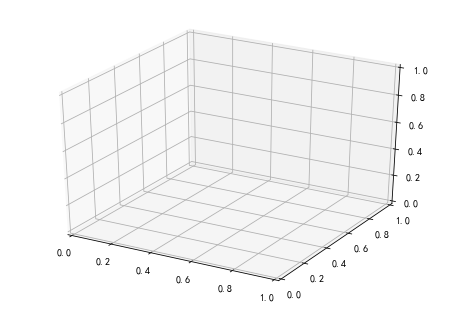

In [2]:
from mpl_toolkits.mplot3d import Axes3D

file_name = f'./pics/profs_viusal_3d_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig = plt.figure()
ax = Axes3D(fig)
for i in range(10):
    ax.text(profs_sample_wv[i,0], profs_sample_wv[i,1], profs_sample_wv[i,2], profs_sample[i])
    ax.text(common_sample_wv[i,0], common_sample_wv[i,1], common_sample_wv[i,2], common_sample[i])
ax.scatter(profs_sample_wv[:,0], profs_sample_wv[:,1], profs_sample_wv[:,2], c='r')
ax.scatter(common_sample_wv[:,0], common_sample_wv[:,1], common_sample_wv[:,2], c='g')
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

Picture has been saved as ./pics/profs_viusal_2d_210403_1517.png.


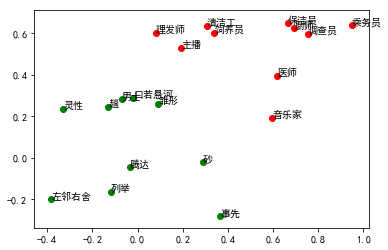

In [63]:
file_name = f'./pics/profs_viusal_2d_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
plt.scatter(profs_sample_wv[:,0], profs_sample_wv[:,1], c='r')
plt.scatter(common_sample_wv[:,0], common_sample_wv[:,1], c='g')
for i in range(len(profs_sample_wv)):
    plt.text(profs_sample_wv[i,0], profs_sample_wv[i,1], profs_sample[i])
    plt.text(common_sample_wv[i,0], common_sample_wv[i,1], common_sample[i])
plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()

D:\IDEs\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


Picture has been saved as ./pics/heatmap_all_210403_1539.png.


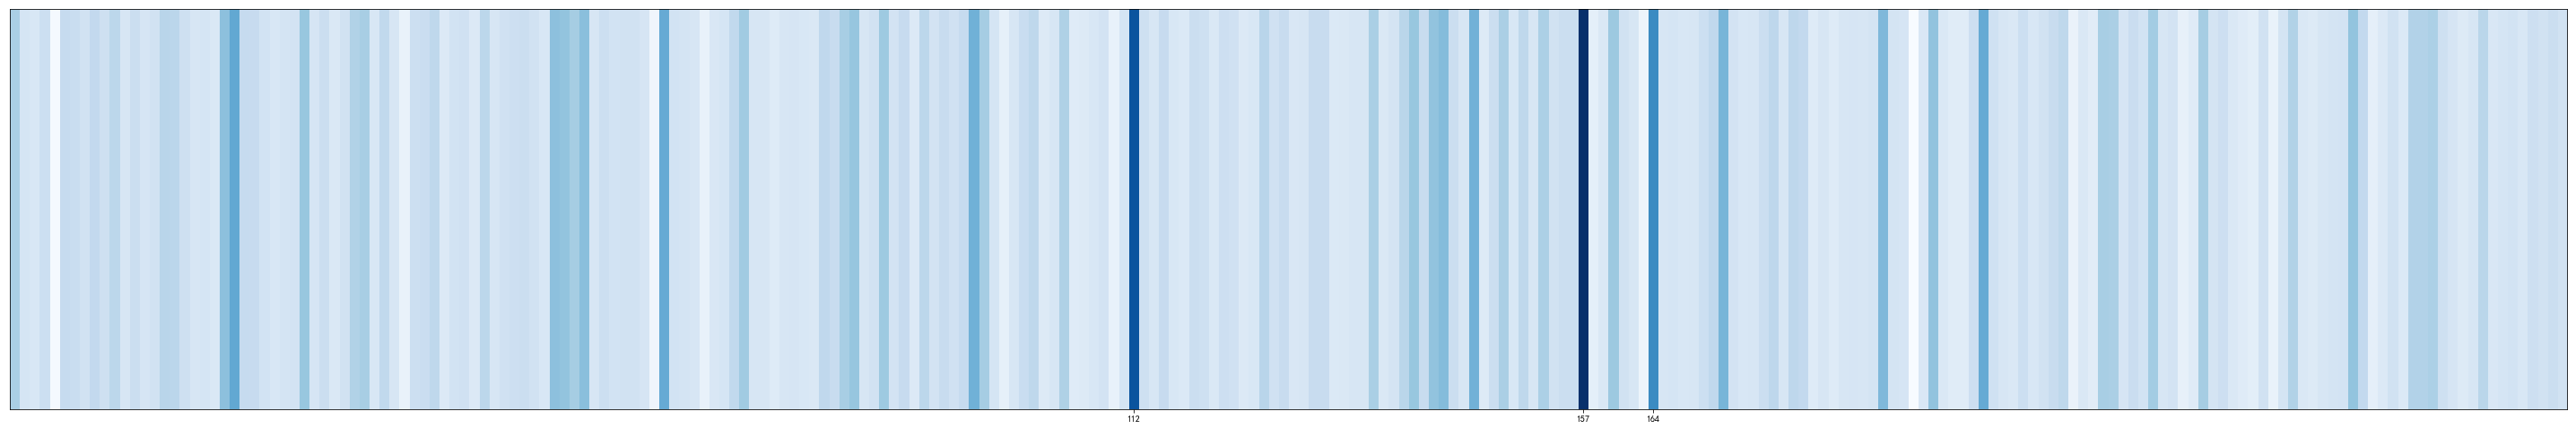

In [80]:
# normalized heatmap
scaled_pre_avg = preprocessing.scale(pre_avg)
file_name = f'./pics/heatmap_all_{time.strftime("%y%m%d_%H%M", time.localtime())}.png'
fig, ax = plt.subplots(figsize=(40, 20))
im = ax.imshow(np.tile(scaled_pre_avg, (40, 1)), cmap='Blues')# pre_avg.shape (1, 256) -> (10, 256)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([i for i in range(256) if i == 112 or i == 157 or i==164])
fig.tight_layout()
# plt.savefig(file_name, dpi=100)
print(f'Picture has been saved as {file_name}.')
plt.show()